LINEAR REGRESSION USING GRADIENT DESCENT

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def loss(X_train, Y_train, thetas):
    return ((Y_train - (X_train @ thetas)) ** 2).mean()


In [3]:
def predict(X, thetas):
    return X @ thetas


In [4]:
def accuracy(X, Y, thetas):
    Y_predicted = predict(X, thetas)
    u = ((Y - Y_predicted) ** 2).sum()
    v = ((Y - Y.mean()) ** 2).sum()
    return 1 - (u / v)


In [5]:
def Gradient_Descent(X, Y_train, learning_rate, num_iterations):
    M, N = X.shape

    X_train = X.copy()
    allOnes = np.ones((len(Y_train), 1))
    X_train = np.hstack([X_train, allOnes])

    np.random.seed(123)
    thetas = np.random.uniform(-10.0, 10.0, N + 1)
    costs = []

    for x in range(num_iterations):
        cost = loss(X_train, Y_train, thetas)
        costs.append(cost)
        slope_array = np.zeros(N + 1)
        for i in range(M):
            f_xi = (thetas * X_train[i]).sum()
            y_i = Y_train[i]
            for j in range(N + 1):
                slope_array[j] += (-2 / M) * (y_i - f_xi) * X_train[i, j]

        thetas -= (learning_rate * slope_array)

    return thetas, costs

LOADING DATA

In [6]:
df = pd.read_csv('USA_Housing.csv')
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']].values
y = df['Price'].values

SPLITTING DATA

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.25)

DATA NORMALIZATION

In [8]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_test_standardized = std_scaler.transform(X_test)
allOnes = np.ones((len(X_test), 1))
X_test = np.hstack([X_test_standardized, allOnes])

FITTING ALGORITHM

In [9]:
final_weights, cost_history = Gradient_Descent(X_train, y_train, 0.01, 500)

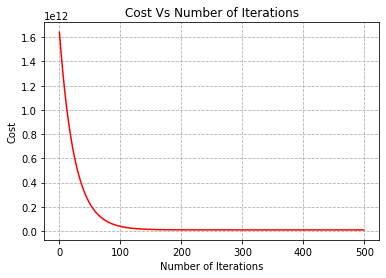

In [10]:
plt.plot(np.arange(len(cost_history)), cost_history, color = 'red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Vs Number of Iterations')
plt.grid(ls = '--')

plt.show()

In [11]:
Y_predicted = predict(X_test, final_weights)

In [12]:
print('Final Weights :', final_weights)
print(cost_history)

Final Weights : [ 229605.76300499  165338.92949811  123376.52765548    1442.13289751
  151051.20671516 1229929.08276713]
[1641120268863.05, 1576383108405.4075, 1514221011608.8896, 1454531276360.466, 1397215311181.671, 1342178469893.4236, 1289329892976.4329, 1238582355353.4597, 1189852120331.04, 1143058799449.1343, 1098125217997.5682, 1054977285968.0967, 1013543874220.4608, 973756695649.9635, 935550191152.8416, 898861420194.1125, 863629955790.6127, 829797783729.6538, 797309205851.1094, 766110747227.817, 736151067085.9653, 707380873313.6333, 679752840411.8777, 653221530748.7345, 627743318982.2179, 603276319523.889, 579780316919.8195, 557216699030.8079, 535548392898.551, 514739803189.0817, 494756753109.23834, 475566427696.1775, 457137319384.0204, 439439175755.6381, 422442949391.3218, 406120749729.68506, 390445796859.58954, 375392377165.1872, 360935800749.3425, 347052360563.7368, 333719293176.86835, 320914741113.9548, 308617716705.4276, 296808067383.2696, 285466442366.9194, 274574260682.82

In [13]:
print('SCORE ON TESTING DATA :', accuracy(X_test, y_test, final_weights))

SCORE ON TESTING DATA : 0.904790837086168
